In [1]:
import numpy as np
import pandas as pd
import glob as gb
import photonics.spectrometer as fl

import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
save = True

# Plot Spectrums

In [3]:
import os
def sort_files(files):
    fname = [os.path.split(f)[1] for f in files]
    fname = [os.path.splitext(f)[0][:-1] for f in fname]  # Remove .txt and K
    return fname

In [4]:
files = gb.glob('./Spectrum/*K.txt')
files = sorted(files, key=sort_files)

In [9]:
# Create a quantative colour cycle for the lines
from cycler import cycler
def set_colour_map(n):
    # Create colormap for plotting n number of colours
    new_colors = [plt.get_cmap('plasma')(1. * i/n) for i in range(n)]
    plt.rc('axes', prop_cycle=(cycler('color', new_colors)))  
set_colour_map(len(files))

<IPython.core.display.Javascript object>


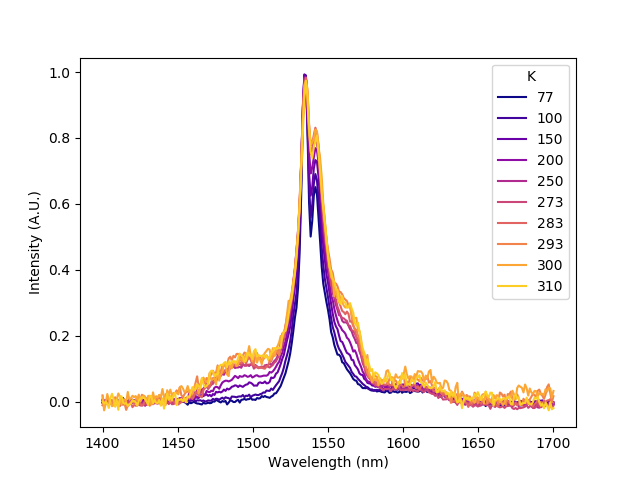

In [38]:
# Plot data
fig, ax = plt.subplots()

# List to store maximum intensity and temp
imax = []
temp = []
for f in files:
    fname = os.path.split(f)[1]
    fname = os.path.splitext(fname)[0][:-1]  # Remove .txt and K
    temp.append(fname)
    data = np.genfromtxt(fname=f, delimiter=',', dtype=float, skip_header=22)
    x = data[:, 0]
    y = data[:, 1]
    imax.append(max(y))
    y = fl.normalise(y)
    y -= np.mean(y[0:10])

    ax.plot(x, y, label=fname)

plt.legend(title='K')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Intensity (A.U.)')
if save:
#     plt.savefig('spectrum_raw')
    plt.savefig('spectrum_norm')

<IPython.core.display.Javascript object>


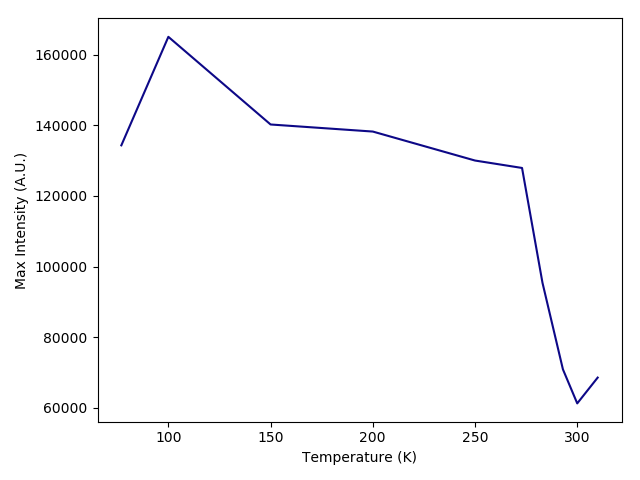

In [39]:
fig, ax = plt.subplots()
ax.plot(temp, imax)
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Max Intensity (A.U.)')
plt.tight_layout()
plt.savefig('max_intensity')

# Plot Lifetimes

In [40]:
def sort_files(files):
    fname = [os.path.split(f)[1] for f in files]
    fname = [os.path.splitext(f)[0][:-1] for f in fname]  # Remove .txt and K
    fname = fname[4:]
    return fname

In [41]:
pump = 2

<IPython.core.display.Javascript object>


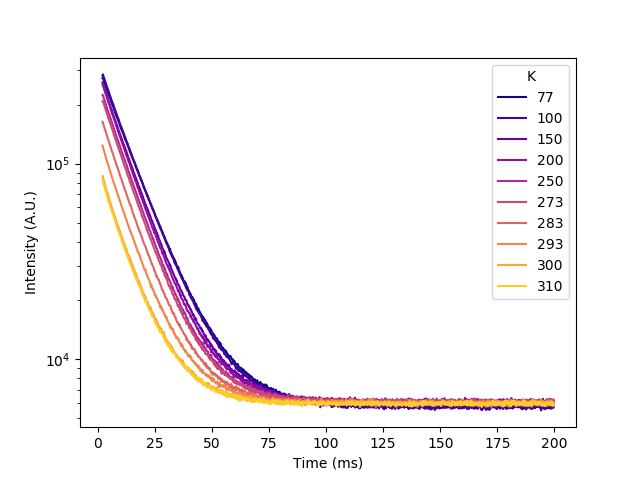

In [62]:
files = gb.glob('./Lifetime/2ms*.txt')
files = sorted(files, key=sort_files)
set_colour_map(len(files))

# Plot data
fig, ax = plt.subplots()

tau = []
temp = []
tau_err = []

for f in files:
    # Get temperature
    fname = os.path.split(f)[1]
    fname = os.path.splitext(fname)[0][4:-1]  # Remove .txt and K
    temp.append(int(fname))
    
    # Extract data
    data = np.genfromtxt(fname=f, delimiter=',', dtype=float, skip_header=10)
    x = data[:,0]/1E6
    y = data[:,1]
    
    # Prepare data and fit
#     y = fl.normalise(y)
    x, y = fl.reject_time(x, y, reject_start=pump)
    popt, perr, chisq = fl.fit_decay(x, y, print_out=False)
    tau.append(popt[1])
    tau_err.append(perr[1])
    
    ax.plot(x, y, label=fname)

ax.set_yscale('log')
plt.legend(title='K')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Intensity (A.U.)')
if save:
#     plt.savefig('lifetime_2ms_raw')
    plt.savefig('lifetime_2ms_norm')

77		13.482	0.007
100		13.125	0.007
150		12.574	0.005
200		12.165	0.004
250		12.071	0.004
273		11.943	0.004
283		11.690	0.005
293		11.361	0.010
300		11.152	0.013
310		11.136	0.013


<IPython.core.display.Javascript object>


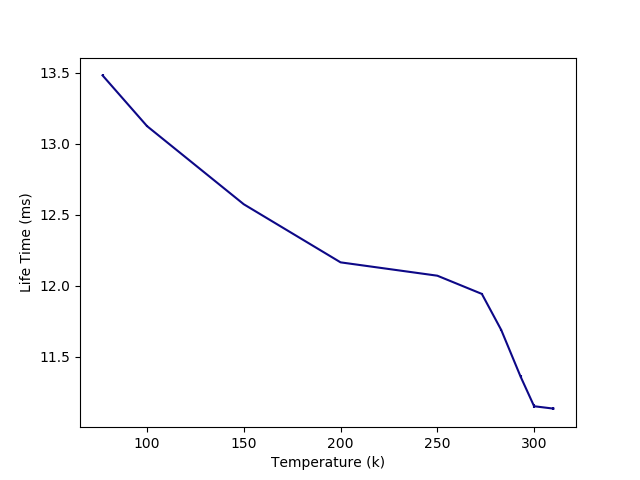

In [66]:
for x, y, stdd in zip(temp, tau, tau_err):
    print('%d\t\t%.3f\t%.3f' % (x, y, stdd))

fig, ax = plt.subplots()
ax.errorbar(temp, tau, tau_err, ls='-')
ax.set_xlabel('Temperature (k)')
ax.set_ylabel('Life Time (ms)')
if save:
    plt.savefig('lifetime_vs_temp_2ms')